In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/AAPL.csv.zip')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
df.shape

(9909, 7)

DATA PREPROCESSING

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [ ]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9909 non-null   datetime64[ns]
 1   Open       9909 non-null   float64       
 2   High       9909 non-null   float64       
 3   Low        9909 non-null   float64       
 4   Close      9909 non-null   float64       
 5   Adj Close  9909 non-null   float64       
 6   Volume     9909 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 542.0 KB


In [ ]:
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9 KB


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
df.sort_index(inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Scaler= MinMaxScaler()
scaler_values= Scaler.fit_transform(df[df.columns])

In [ ]:
scaler_values

array([[9.69775251e-04, 9.67382823e-04, 9.80847252e-04, 9.69299159e-04,
        7.67918183e-04, 6.30227653e-02],
       [8.94119040e-04, 8.85632201e-04, 8.97958702e-04, 8.87386505e-04,
        7.03023637e-04, 2.35161825e-02],
       [7.84073585e-04, 7.76631279e-04, 7.87440759e-04, 7.78169755e-04,
        6.16497546e-04, 1.40614092e-02],
       ...,
       [7.71985944e-01, 7.79247048e-01, 7.71161400e-01, 7.78626234e-01,
        7.78653845e-01, 2.24503966e-02],
       [7.86960927e-01, 8.00519617e-01, 7.79207129e-01, 7.77036025e-01,
        7.77063834e-01, 2.63620696e-02],
       [7.58921336e-01, 7.58493270e-01, 7.39380879e-01, 7.36119074e-01,
        7.36151986e-01, 2.35080965e-02]])

In [ ]:
df_scaled= pd.DataFrame(scaler_values, columns=df.columns, index=df.index)
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000970,0.000967,0.000981,0.000969,0.000768,0.063023
1980-12-15,0.000894,0.000886,0.000898,0.000887,0.000703,0.023516
1980-12-16,0.000784,0.000777,0.000787,0.000778,0.000616,0.014061
1980-12-17,0.000812,0.000811,0.000822,0.000812,0.000644,0.011462
1980-12-18,0.000853,0.000852,0.000863,0.000853,0.000676,0.009711


Plotting columns

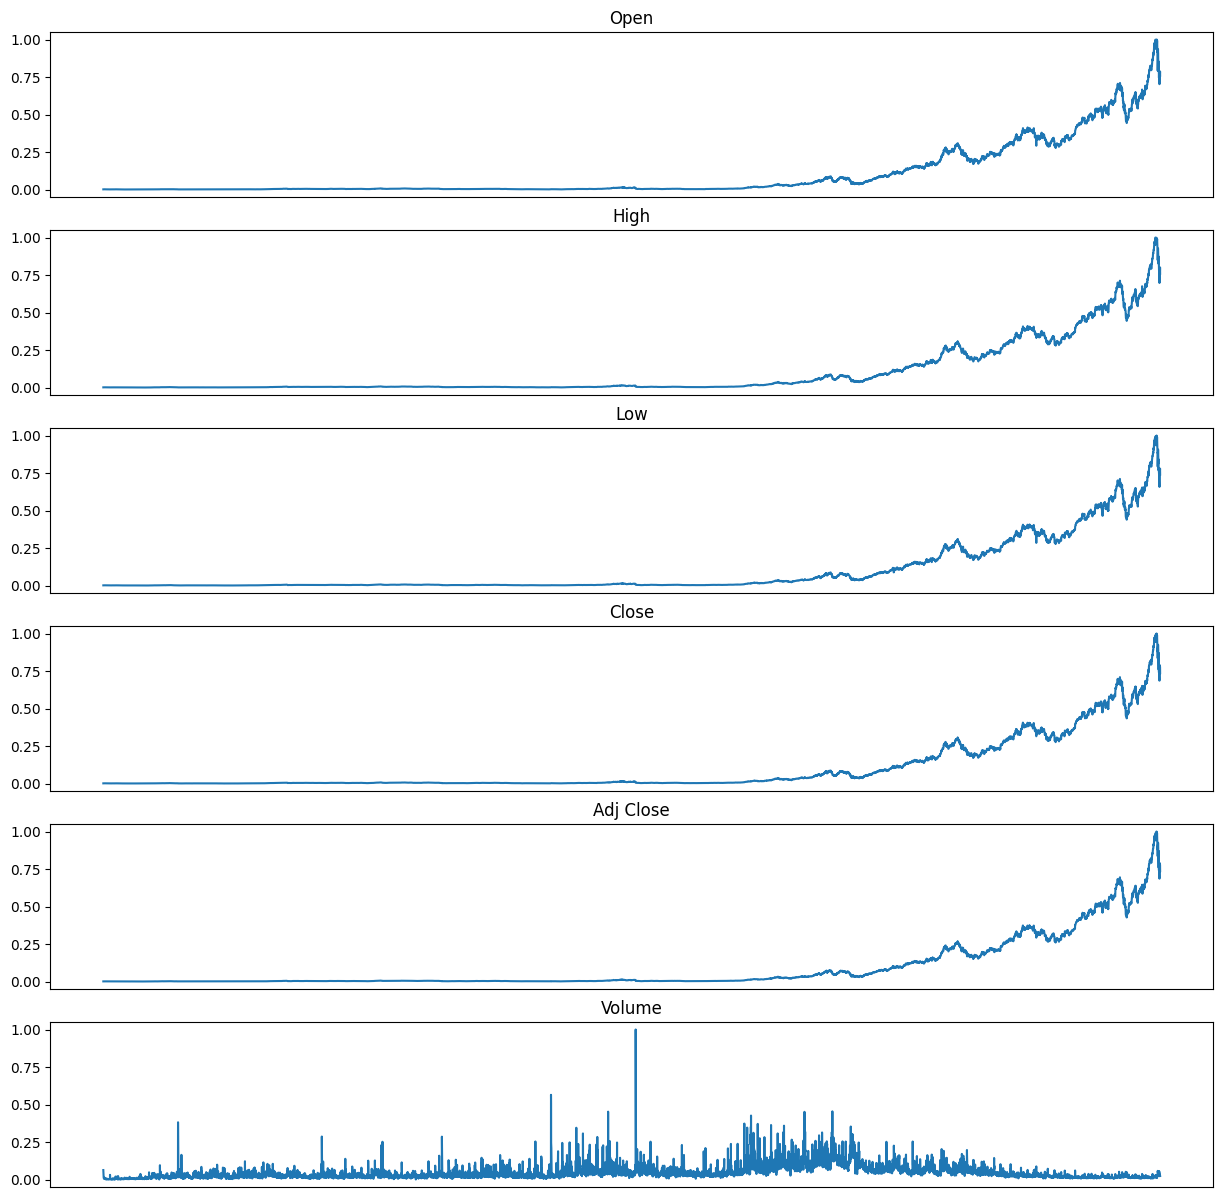

In [ ]:
plt.rcParams['figure.figsize']=(15,15)
figure, axes= plt.subplots(6)
for ax, col in zip(axes, df_scaled.columns):
  ax.plot(df_scaled[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)

Creating sliding window sequence

In [ ]:
##[1,2,3,,,,,10]
 # window_size= 3
 #[1,2,3]->[4]
 #[2,3,4]->[5]
 #[3,4,5]->[6]

In [ ]:
def create_sequence(data, window_size):
  x=[]
  y=[]
  for i in range(window_size, len(data)):
    x.append(data.iloc[i-window_size:i].values)
    y.append(data.iloc[i].values)
  return np.array(x), np.array(y)

In [ ]:
window_size=60
x,y= create_sequence(df_scaled, window_size)

In [ ]:
x.shape, y.shape

((9849, 60, 6), (9849, 6))

In [ ]:
x

array([[[9.69775251e-04, 9.67382823e-04, 9.80847252e-04, 9.69299159e-04,
         7.67918183e-04, 6.30227653e-02],
        [8.94119040e-04, 8.85632201e-04, 8.97958702e-04, 8.87386505e-04,
         7.03023637e-04, 2.35161825e-02],
        [7.84073585e-04, 7.76631279e-04, 7.87440759e-04, 7.78169755e-04,
         6.16497546e-04, 1.40614092e-02],
        ...,
        [8.11584926e-04, 8.03881487e-04, 8.08162897e-04, 7.98647918e-04,
         6.32720932e-04, 1.37655702e-03],
        [6.94661658e-04, 6.88068037e-04, 6.97644861e-04, 6.89431077e-04,
         5.46195114e-04, 1.87767208e-03],
        [6.32761163e-04, 6.26755092e-04, 6.35478449e-04, 6.27996587e-04,
         4.97524592e-04, 3.63761231e-03]],

       [[8.94119040e-04, 8.85632201e-04, 8.97958702e-04, 8.87386505e-04,
         7.03023637e-04, 2.35161825e-02],
        [7.84073585e-04, 7.76631279e-04, 7.87440759e-04, 7.78169755e-04,
         6.16497546e-04, 1.40614092e-02],
        [8.11584926e-04, 8.10694016e-04, 8.21977594e-04, 8.122999

Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((7879, 60, 6), (1970, 60, 6))

Building LSTM Model

In [ ]:
model= keras.Sequential([keras.layers.LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], x_train.shape[2])),
                         keras.layers.Dropout(0.3),
                         keras.layers.LSTM(50, return_sequences=True),
                         keras.layers.Dropout(0.3),
                         keras.layers.LSTM(50,return_sequences=False),
                         keras.layers.Dropout(0.3),
                         keras.layers.Dense(y_train.shape[1])
                         ])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])

In [ ]:
EarlyStopping= EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

lstm_model= model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=3, callbacks=[EarlyStopping])

Epoch 1/50
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - RootMeanSquaredError: 0.0333 - loss: 0.0011 - val_RootMeanSquaredError: 0.0189 - val_loss: 3.5655e-04
Epoch 2/50
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - RootMeanSquaredError: 0.0329 - loss: 0.0011 - val_RootMeanSquaredError: 0.0227 - val_loss: 5.1746e-04
Epoch 3/50
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - RootMeanSquaredError: 0.0313 - loss: 9.8067e-04 - val_RootMeanSquaredError: 0.0348 - val_loss: 0.0012
Epoch 4/50
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - RootMeanSquaredError: 0.0328 - loss: 0.0011 - val_RootMeanSquaredError: 0.0338 - val_loss: 0.0011
Epoch 5/50
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - RootMeanSquaredError: 0.0308 - loss: 9.5598e-04 - val_RootMeanSquaredError: 0.0140 - val_loss: 1.9533e-04
Epoch 6/50
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - RootMeanSquaredError: 0.0310 - loss: 9.6717e-04 - val_RootMeanSquaredError: 0.0197 - val_loss: 3.8640e-04
Epoch 7/50
1970/1970 ━━━━━━━━━━━━━━━

In [ ]:
predictions= model.predict(x_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


Forecasting the data

In [ ]:
predictions[:10]

array([[0.03956433, 0.03986464, 0.03895001, 0.03925316, 0.03336471,
        0.09802453],
       [0.00651834, 0.00653883, 0.00641379, 0.00648495, 0.00589262,
        0.0214335 ],
       [0.00384405, 0.00391883, 0.00368345, 0.00382094, 0.00303852,
        0.03265304],
       [0.11320183, 0.11311714, 0.11258897, 0.11243378, 0.10187684,
        0.05740032],
       [0.00629145, 0.00663424, 0.00581226, 0.00620177, 0.00350508,
        0.08877287],
       [0.21813801, 0.21790205, 0.21715567, 0.21666022, 0.20018859,
        0.05703156],
       [0.00471843, 0.00475837, 0.0045971 , 0.0046946 , 0.00408574,
        0.02536908],
       [0.00397124, 0.00398953, 0.00386876, 0.00395283, 0.00343634,
        0.02186617],
       [0.00618973, 0.00647578, 0.00576782, 0.00611165, 0.00368977,
        0.07830344],
       [0.15460426, 0.15444162, 0.15387532, 0.1535626 , 0.14076737,
        0.05325215]], dtype=float32)

In [ ]:
#inverse scaling
predictions= Scaler.inverse_transform(predictions)
y_test_rescaled= Scaler.inverse_transform(y_test)

In [ ]:
predictions[:10]

array([[1.30389204e+01, 1.32603626e+01, 1.27832642e+01, 1.30323524e+01,
        1.10673800e+01, 1.82188880e+08],
       [2.31413198e+00, 2.34111738e+00, 2.26906705e+00, 2.31702971e+00,
        2.08278632e+00, 4.01076880e+07],
       [1.44621217e+00, 1.48267198e+00, 1.38674796e+00, 1.44588995e+00,
        1.14936852e+00, 6.09206480e+07],
       [3.69373322e+01, 3.72616425e+01, 3.65799561e+01, 3.69626770e+01,
        3.34738846e+01, 1.06828416e+08],
       [2.24049592e+00, 2.37237692e+00, 2.07468033e+00, 2.22443080e+00,
        1.30195522e+00, 1.65026480e+08],
       [7.09934616e+01, 7.15945587e+01, 7.03710556e+01, 7.10450974e+01,
        6.56261902e+01, 1.06144344e+08],
       [1.72998631e+00, 1.75774562e+00, 1.68199718e+00, 1.73158073e+00,
        1.49185717e+00, 4.74084440e+07],
       [1.48749268e+00, 1.50583398e+00, 1.44663179e+00, 1.48901844e+00,
        1.27947450e+00, 4.09103160e+07],
       [2.20748281e+00, 2.32045770e+00, 2.06032109e+00, 2.19496059e+00,
        1.36235785e+00, 

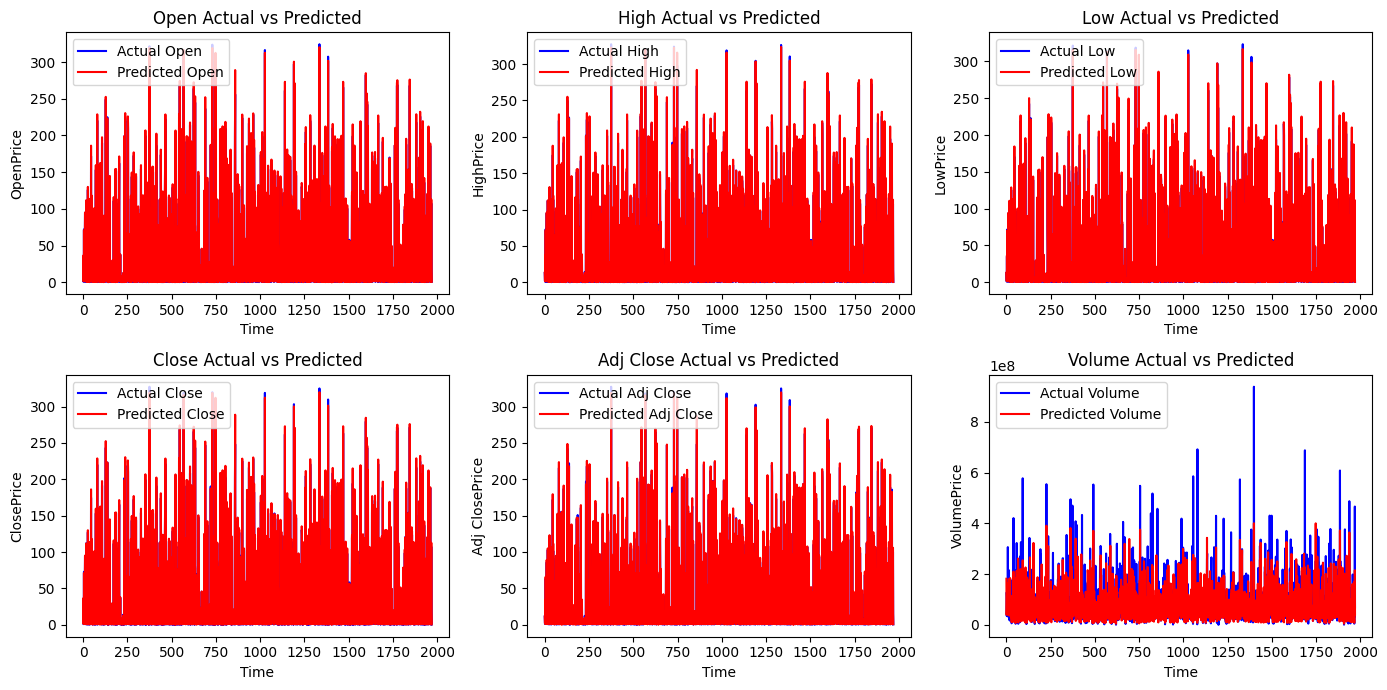

In [ ]:
#plotting the results
plt.figure(figsize=(14, 7))

for i, col in enumerate(df_scaled.columns):
  plt.subplot(2, 3, i+1)
  plt.plot(y_test_rescaled[:, i],color='blue', label=f'Actual {col}')
  plt.plot(predictions[:, i],color='red', label=f'Predicted {col}')
  plt.title(f'{col} Actual vs Predicted')
  plt.xlabel('Time')
  plt.ylabel(f'{col}Price')
  plt.legend()
plt.tight_layout()
plt.show()